In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

<function matplotlib.pyplot.show(*args, **kw)>

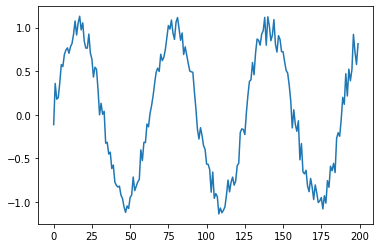

In [2]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1 #noisy sin wave
plt.plot(series)
plt.show

In [4]:
#Building the dataset:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t: t + T]
  y = series[t + T]
  X.append(x)
  Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)
print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

X.shape =  (190, 10, 1)
Y.shape =  (190,)


In [11]:
#AutoRegressive RNN model:
i = Input(shape = (T, D))
x = SimpleRNN(5, activation = 'relu')(i)  #In documentation, default activation is tanh
x = Dense(1)(x)

model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate = 0.1)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data = (X[-N//2:], Y[-N//2:]),
    epochs = 80 
)

Epoch 1/80
3/3 [==============================] - 2s 139ms/step - loss: 1.2634 - val_loss: 0.3800
Epoch 2/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2626 - val_loss: 0.2102
Epoch 3/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1550 - val_loss: 0.1252
Epoch 4/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0807 - val_loss: 0.0626
Epoch 5/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0360 - val_loss: 0.0504
Epoch 6/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0290 - val_loss: 0.0454
Epoch 7/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0308 - val_loss: 0.0529
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0297 - val_loss: 0.0542
Epoch 9/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0308 - val_loss: 0.0483
Epoch 10/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0306 - val_loss: 0.0460
Epoch 11/80
3/3 [===========

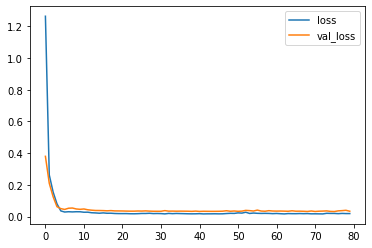

In [12]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [13]:
#Wrong way to forecast(using true values):
val_target = Y[-N//2:]
val_prediction = []
i = -N // 2
while len(val_prediction) < len(val_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0] #input should be 2-D(matrix), output is also a matrix.
  val_prediction.append(p)
  i += 1

1/1 [==============================] - 0s 22ms/step


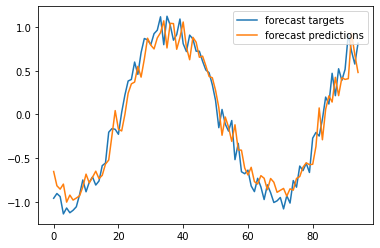

In [14]:
#Even though this looks correct, it is an incorrect way of forecasting, as we are not predicting future values using predicted values.
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()
#Prediction just looks shifted, i.e. the model is simply copying the previous value.

In [15]:
#Correct way to forecast(using predicted values):
val_prediction = []
last_x = X[-N//2]
while len(val_prediction) < len(val_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
  val_prediction.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 21ms/step


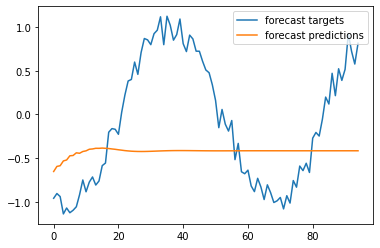

In [16]:
#For a sin wave without noise, simpleRNN performs worse than autoregressive model, due to more flexibility of RNN
#Just because ANN is more flexible, it doesn't perform better than CNN on images.
#The autoregressive model fits perfectly on the sin wave, as shown by the analytical solution(recurrence relation proof).
#However the flexibility of RNN allows us to do more powerful things.
#In the model above if you set activation = none, the model reduces to a linear one, and can fit perfectly.
#The linear model performs well on the sin wave, but does not hit correct values in case of noise.
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()
#Again model just seems to copy previous value, hence linear. Not really a good model, or a model at all.